<a href="https://colab.research.google.com/github/EnriqueAranaz/AnalisisSentimiento/blob/main/AnalisisSentIberia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch transformers ntscraper pandas
import pandas as pd
import time
from ntscraper import Nitter
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

Extracción de ***Tweets***

Ha habido que hacer la descarga en varias ocasiones debido a que no deja, guardandose en varios archivos y luego uniendolos todos

In [ ]:
from ntscraper import Nitter

#Inicializar el scraper y obtener los tweets

# Inicializa el scraper
scraper = Nitter(0)

# Obtén tweets con límites de fechas
tweets = scraper.get_tweets("iberia lang:es", mode='hashtag', number=100,  until='2024-09-30')

Testing instances: 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]
INFO:root:No instance specified, using random instance https://nitter.privacydev.net


In [ ]:
tweets

{'tweets': [], 'threads': []}

In [ ]:
# Procesa los tweets
final_tweets = []
for x in tweets['tweets']:
    data = [x['link'], x['text'], x['date'], x['stats']['likes'], x['stats']['comments']]
    final_tweets.append(data)

# Crea el DataFrame
dat = pd.DataFrame(final_tweets, columns=['twitter_link', 'text', 'date', 'likes', 'comments'])

# Función para eliminar todo lo que venga después de y incluyendo '/status'
def remove_status(link):
    return link.split('/status')[0]

# Aplicar la función a la columna 'twitter_link'
dat['twitter_link'] = dat['twitter_link'].apply(remove_status)

# Guarda el DataFrame en un archivo Excel sin incluir el índice
dat.to_excel('tweets_iberia.xlsx', index=False)

In [ ]:
# Guarda el DataFrame en un archivo Excel sin incluir el índice
dat.to_excel('tweets_iberia_new21.xlsx', index=False)

# Descarga el archivo
files.download('tweets_iberia_new21.xlsx')

**Cagar el archivo con todos los Tweets**

In [ ]:
#Subir el archivo a Google Colab
from google.colab import files
uploaded = files.upload()

Saving tweets_iberia_new.xlsx to tweets_iberia_new.xlsx


In [ ]:
# Cargar el archivo Excel en un DataFrame
dat = pd.read_excel('/content/tweets_iberia_new.xlsx')

# Mostrar las primeras filas del DataFrame
dat

,twitter_link,text,date,likes,comments
0,https://twitter.com/novedadesaereas,"⚠️⚠️O'Leary menciona ""ganas de que salga adelante la operación"" de #Iberia y #AirEuropa y cree que un 30% de los slots de IB en #Madrid deberían c...","Apr 1, 2024 · 1:43 PM UTC",146,11
1,https://twitter.com/dinkyviajeros,😱 ¿Tu vuelo ha sido cancelado y no sabes cómo reclamar el reembolso del billete? ☹ En este tutorial te explicamos cómo reclamar a la principales ...,"Apr 1, 2024 · 2:30 PM UTC",0,1
2,https://twitter.com/romtolousse,Parece que ahora sí... al menos tenemos avion #coruña #iberia #vuelocancelado,"Apr 1, 2024 · 4:06 PM UTC",3,0
3,https://twitter.com/AzucenaPelaez,"@Iberia @consumidores @TurismoMadrid @minturgob @consumogob @AesaSpain Tras varias conversaciones en privado con #IBERIA, siguen negando su respo...","Apr 1, 2024 · 6:18 AM UTC",0,2
4,https://twitter.com/conexiohispanoa,"Iberia anuncia vuelos directos Madrid-Tokio desde octubre 2024, fortaleciendo conexiones entre España, Japón y América Latina. ✈️🇪🇸🇯🇵 #VuelosDirec...","Apr 1, 2024 · 7:31 PM UTC",0,0
...,...,...,...,...,...
2254,https://twitter.com/pdispain,El TSJM confirma el despido disciplinario de un trabajador de Iberia por sustraer una pantalla de ordenador https://postly.app/3cTR #empleo #Iberi...,"Sep 2, 2024 · 7:05 AM UTC",0,0
2255,https://twitter.com/raulamaros,"Está situación de @iberia ya rebasa los límites de la paciencia, llevamos UNA semana SIN equipaje, son 4 maletas y me avisan que van a entregar UN...","Sep 2, 2024 · 5:38 AM UTC",0,1
2256,https://twitter.com/America_Vuela,Iberia lanza campaña de precios especiales para conectar México con Europa #AméricaVuela #AviaciónComercial #Aviación #Iberia #Campaña #PreciosEs...,"Sep 1, 2024 · 10:00 PM UTC",1,0
2257,https://twitter.com/avclubcenter,#ActualidadAviacion | Iberia aumentará su capacidad internacional desde el mes de septiembre Más información: https://aviationclubcenter.com/inde...,"Sep 1, 2024 · 1:58 PM UTC",0,0


In [ ]:
# dimension de los datos
print("El tamaño del dataset es : ", dat.shape)
print("")


El tamaño del dataset es :  (2259, 5)



In [ ]:
# Chequear valores duplicados
print("---- Duplicados ----")
print("Número de duplicados: " + str(dat.duplicated().sum()))
print("")

# Eliminar duplicados
dat = dat.drop_duplicates()

---- Duplicados ----
Número de duplicados: 0



In [ ]:
# Eliminar duplicados en texto y sumar 'likes' y 'comments'
dat_grouped = dat.groupby(['twitter_link', 'text']).agg({
    'date': 'first',
    'likes': 'sum',
    'comments': 'sum'
}).reset_index()
# dimension de los datos tras eliminar textos duplicados es
print("El tamaño del dataset tras eliminar textos duplicados es : ", dat_grouped.shape)
print("")

El tamaño del dataset tras eliminar textos duplicados es :  (2042, 5)



**Aplicamos modelo Beto**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

#Cargar el modelo y el tokenizador de BETO
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/beto-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/beto-sentiment-analysis")

#Definir la función de análisis de sentimiento
def analizar_sentimiento(texto):
    inputs = tokenizer(texto, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits).item()
    labels = ["NEG", "NEU", "POS"]
    return labels[predicted_class_id]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/481k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
#Definir la función de análisis de sentimiento
def analizar_sentimiento(texto):
    inputs = tokenizer(texto, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits).item()
    labels = ["NEG", "NEU", "POS"]
    return labels[predicted_class_id]

In [ ]:
#Aplicar la función de análisis de sentimiento a cada tweet
dat_grouped['sentimiento'] = dat_grouped['text'].apply(analizar_sentimiento)
dat_grouped

,twitter_link,text,date,likes,comments,sentimiento
0,https://twitter.com/205winstonsmith,"no ya compensar, pero por lo menos devolverme el dinero de los asientos que me hicieron ELLOS COMPRAR como unica posibilidad para viajar cerca uno...","Jan 21, 2024 · 5:21 PM UTC",0,1,NEG
1,https://twitter.com/21NoticiasCom,.@UGT_Galicia valora os avances na reunión con SOEGS (empresa que xestiona os servizos de asistencia en rampa e pasaxe de #Iberia) https://21not...,"May 29, 2024 · 11:21 AM UTC",0,0,POS
2,https://twitter.com/7TeleValencia,✈️✈️ HUELGA AÉREA: Iberia cancela 444 vuelos por la huelga del 5 al 8 de enero🛩🛩🛩🛩 #huelga #Iberia #aviones #vacaciones https://7televalencia.com/...,"Dec 30, 2023 · 9:00 AM UTC",0,0,NEG
3,https://twitter.com/AEMET_LaRioja,"Iberia acusa a Aena de ""irregularidades"" en la adjudicación de los servicios de 'handling' de ocho aeropuertos https://www.elmundo.es/economia/202...","Oct 23, 2023 · 9:25 AM UTC",0,0,NEG
4,https://twitter.com/AHeathrow,"@Iberia llevo desde el jueves intentando comprar un vuelo MAD-TNF y al ir a pagar da error, he intentado hasta 3 formas de pago y da error al paga...","Mar 11, 2024 · 11:27 AM UTC",0,7,NEG
...,...,...,...,...,...,...
2037,https://twitter.com/yenbaez,"@Iberia @iberiaexpress Estimados desde el 26 de septiembre están gestionando un reembolso bajo la reserva ficticia PNR LD36QI. Muchos correos, me...","Dec 27, 2023 · 4:08 PM UTC",0,1,NEU
2038,https://twitter.com/yenbaez,"El caso lleva desde el 26 de septiembre en trámite y, hasta ahora, nada ha pasado. Lástima que el #ServicoalCliente sea tan pésimo. Y tan poco ef...","Dec 29, 2023 · 7:31 PM UTC",0,2,NEG
2039,https://twitter.com/yolanda_sanz,"#Iberia pierde tus maletas #iberiaplatino, dos días sin saber nada!! Tercera vez en Barajas","Jul 21, 2024 · 2:05 PM UTC",0,0,NEG
2040,https://twitter.com/yomismovaya,Puta mierda de iberia #iberia @Iberia_en,"Jul 17, 2024 · 9:32 AM UTC",0,0,NEG


In [ ]:
# Contar los valores de 'sentimiento'
sentimiento_count = dat_grouped['sentimiento'].value_counts()
sentimiento_count

,count
sentimiento,
NEU,860
NEG,657
POS,525


In [ ]:

sentimiento_sums = dat_grouped.groupby('sentimiento').agg({
    'likes': 'sum',
    'comments': 'sum',
}).reset_index()
# Unir los dos DataFrames
sentimiento_analysis = sentimiento_sums.merge(sentimiento_count, on='sentimiento', how='outer')
sentimiento_analysis

,sentimiento,likes,comments,count
0,NEG,1891,985,630
1,NEU,8375,566,816
2,POS,8013,369,496


In [ ]:
from tabulate import tabulate # Instala tabulate si aún no lo tienes: pip install tabulate
# Filtrar por sentimiento negativo
negativos = dat_grouped[dat_grouped['sentimiento'] == 'NEG']
negativos[['text','sentimiento']]

In [ ]:
# Filtrar por sentimiento negativo
positivos = dat_grouped[dat_grouped['sentimiento'] == 'POS']
positivos[['text','sentimiento']]

,text,sentimiento
1,.@UGT_Galicia valora os avances na reunión con SOEGS (empresa que xestiona os servizos de asistencia en rampa e pasaxe de #Iberia) https://21not...,POS
15,"#iberia me acaba de explicar por qué es la aerolínea más puntual, para ellos 31 horas es un día, así razona el centro de atención al usuario cuand...",POS
20,"Muy profesionales #iberia, cambiáis se opinión dependiendo quien ejerza la reclamación. Gracias #comunidadmadrid",POS
25,"Buenas tardes, aviadores! ✈️🇪🇸❤️ #Iberia #EspacioIberia #GranVia #Madrid #España @Iberia",POS
29,"#EntrevistAER #AutomationREVIEW #Diciembre23 “Podemos abordar una solución completa de automatización: Input, Logic, Output, Robotic y Safety” | ...",POS
...,...,...
2029,"Aca tenemos una de #Iberia cortesia de un viaje de @Mafabuda . cuando puedas sacale foto y posteala, amo esa cuchara",POS
2031,"Nuestro amigo #LeviSandoval regresó hoy a #ElSalvador, tras cumplir su sueño de ver jugar al #BarcelonaFC, invitado por el portero azulgrana #TerS...",POS
2032,"Ha ganado #Iberia, será la primer aerolínea en cruzar el Atlántico en un #A321XLR...",POS
2035,"Metin2 Iberia - Actualización 24.0 - Potencia de nivel concentrada Metin2 está al llegar: ¡nuevas misiones de caza, áreas de nivel revisadas y ...",POS


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Descargar stopwords en español si aún no están disponibles
nltk.download('stopwords')

# Obtener stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Añadir palabras adicionales a la lista de stopwords
additional_stopwords = {'el', 'la', 'lo', 'una', 'te', 'qué', 'enero', 'dos', 'si', 'e','con', 'que', 'ha', 'sus','este','por', '#iberia','Iberia', '@iberia', 'iberia', '2024','444','en', 'las', 'los', 'tras','de', 'un', 'a', 'https','y','para','su','se','o','www','com','le','al','html'}
all_stopwords = spanish_stopwords.union(additional_stopwords)

# Filtrar los tweets con sentimiento negativo
negative_tweets = dat_grouped[dat_grouped['sentimiento'] == 'NEG']

# Función para agrupar palabras similares
def group_words(text):
    word_groups = {
        'retraso': ['retraso', 'retrasos'],
        'maleta':['maleta','maletas']
        # Añade más grupos según sea necesario
    }
    for group, variants in word_groups.items():
        for variant in variants:
            text = text.replace(variant, group)
    return text

# Aplicar agrupación de palabras
negative_tweets['processed_text'] = negative_tweets['text'].apply(group_words)

# Crear y aplicar el vectorizador
vectorizer = CountVectorizer(stop_words=list(all_stopwords))
X = vectorizer.fit_transform(negative_tweets['processed_text'])

# Obtener las palabras y sus frecuencias
word_freq = pd.DataFrame(X.sum(axis=0).T, columns=['frequency'], index=vectorizer.get_feature_names_out())
word_freq = word_freq.sort_values('frequency', ascending=False)

# Mostrar las palabras más frecuentes
print(word_freq.head(40))

             frequency
huelga             230
vuelo              126
vuelos             123
maleta             115
madrid              89
handling            80
aeropuerto          76
días                62
equipaje            54
retraso             54
servicio            51
pasajeros           48
después             42
aena                42
cancela             41
horas               37
solo                36
air                 34
españa              33
tierra              33
ahora               32
cliente             31
barajas             30
vergüenza           30
sindicatos          29
aeropuertos         29
afectados           29
viajeros            28
día                 28
hacer               28
derechos            28
aerolínea           28
aireuropa           27
hace                27
hoy                 26
compañía            26
europa              26
noticias            26
ugt                 25
mal                 25


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-49-c40d8213fa34>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets['processed_text'] = negative_tweets['text'].apply(group_words)


In [ ]:
word_freq.head(40)

,frequency
huelga,230
vuelo,126
vuelos,123
maleta,115
madrid,89
handling,80
aeropuerto,76
días,62
equipaje,54
retraso,54


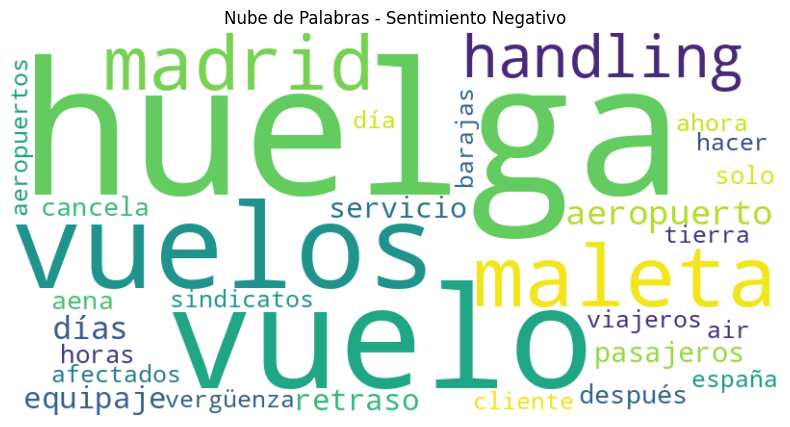

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir el DataFrame de frecuencias a un diccionario
word_freq_dict = word_freq['frequency'].to_dict()

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=30).generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Sentimiento Negativo')
plt.show()

In [ ]:
def filter_tweets_by_words(df, words, text_column='text'):
    # Convertir las palabras a minúsculas para una búsqueda insensible a mayúsculas
    words = [word.lower() for word in words]

    # Crear una máscara booleana para cada palabra
    masks = [df[text_column].str.lower().str.contains(word) for word in words]

    # Combinar todas las máscaras con OR
    final_mask = pd.concat(masks, axis=1).any(axis=1)

    # Aplicar la máscara al DataFrame
    filtered_df = df[final_mask]

    return filtered_df

# Lista de palabras que quieres buscar
palabras_buscar = ['retraso', 'cancelación', 'verguenza']

# Aplicar el filtro
tweets_filtrados = filter_tweets_by_words(negative_tweets, palabras_buscar)

In [ ]:
# Aumentar el ancho máximo de las columnas (ajusta el número según tus necesidades)
pd.set_option('display.max_colwidth', 150)

# Filtrar los tweets (usando la función que definimos anteriormente)
tweets_filtrados = filter_tweets_by_words(negative_tweets, palabras_buscar)

# Ordenar los tweets por la cantidad de comentarios en orden descendente
tweets_ordenados = tweets_filtrados.sort_values(by='comments', ascending=False)

# Mostrar los tweets filtrados con las columnas 'text' y 'sentimiento'
display(tweets_ordenados[['text','comments','likes','sentimiento']].head(50))  # Muestra las primeras 50 filas

,text,comments,likes,sentimiento
1593,Otro día que pasa sin que @iberia me devuelva la plata de la reserva (ya emitida) que cancelaron. Seguro van a responder diciendo que me mandaron ...,9,0,NEG
1232,"Asi trata @Iberia a su gente. Después de cancelar el vuelo sin ninguna respuesta sus agentes, no esperan ni 5 minutos para cerrarte la conversaci...",7,0,NEG
772,@Iberia cuarta vez que nos perdéis una maleta. 20 horas de viaje y ahora llevamos 45 minutos haciendo cola para reclamar un equipaje que perdistei...,7,9,NEG
143,"@Iberia Que vergüenza que traten el equipaje de mano así , la maleta llegó dañada , rota y nadie responde por los daños!! #iberia#verguenza",7,1,NEG
1159,Iberia #iberia ahora me. Atiende Evelyn Zambrano y me dice usted voló el 31 y ese vuelo ae canceló. Que burda respuesta teniendo yo toda la inform...,6,2,NEG
1145,He presentado un reclamo en @AesaSpain ya que @Iberia no me compensa por un retraso de 9 hs en un vuelo de @FlyWithLEVEL . A la espera de cómo fun...,6,1,NEG
1137,"@Iberia que desastre retraso mal gestión del acceso a bordo. Todo los días mandado información pero del retraso no, hoy tb correo de la segunda co...",5,1,NEG
235,Increible @Iberia que te pagas un plus de asiento (con lo que ya cuestan de por sí los billetes) y al hacer el check-in te sientan donde les sale ...,5,0,NEG
1338,"Frustración no, indignación. los procedimientos ya se han seguido y habéis demostrado que os aprovecháis del débil y sois una empresa con muy poca...",5,3,NEG
1322,@Iberia es normal que en una hora no hayan salido las maletas del vuelo de Málaga? Llevo más en barajas que en el aire! Aquí el ambiente se esta c...,5,1,NEG


In [ ]:
from tabulate import tabulate

# Instala tabulate si aún no lo tienes: pip install tabulate

# Mostrar los tweets en formato de tabla
print(tabulate(tweets_ordenados[['comments','likes','text']], headers='keys', tablefmt='pipe', showindex=False))

|   comments |   likes | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|-----------:|--------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|          9 |       0 | Otr

In [ ]:
# Asegúrate de que estamos trabajando con los tweets negativos
negative_tweets = dat_grouped[dat_grouped['sentimiento'] == 'NEG']

# Contar los tweets negativos por enlace de Twitter
conteo_enlaces = negative_tweets['twitter_link'].value_counts()

# Si quieres ver también el porcentaje
total_tweets = len(negative_tweets)
conteo_porcentaje = (conteo_enlaces / total_tweets * 100).round(2)

print("\nEnlaces de Twitter con más tweets negativos")
resultado = pd.DataFrame({
    'Conteo': conteo_enlaces,
    'Porcentaje': conteo_porcentaje
})
display(resultado.head(20))  # Muestra los top 20


Enlaces de Twitter con más tweets negativos


,Conteo,Porcentaje
twitter_link,,
https://twitter.com/VincentOrtais,11,1.67
https://twitter.com/arturashe,11,1.67
https://twitter.com/sindicatostavla,11,1.67
https://twitter.com/RTVCes,9,1.37
https://twitter.com/JuanjoMorodo,8,1.22
https://twitter.com/JeannetteRen,7,1.07
https://twitter.com/Gacetinmadrid,6,0.91
https://twitter.com/Angelakutcher,6,0.91
https://twitter.com/RTVCCanarias,6,0.91


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Función para convertir la fecha
def parse_date(date_string):
    return datetime.strptime(date_string.split(' · ')[0], '%b %d, %Y')

# Convertir la columna de fecha
dat_grouped['fecha'] = dat_grouped['date'].apply(parse_date)

# Extraer el mes y el año
dat_grouped['mes_año'] = dat_grouped['fecha'].dt.to_period('M')

sentimiento_por_mes_pct = sentimiento_por_mes.div(sentimiento_por_mes.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
for sentimiento in sentimiento_por_mes_pct.columns:
    plt.plot(sentimiento_por_mes_pct.index.astype(str), sentimiento_por_mes_pct[sentimiento], marker='o', label=sentimiento)

plt.title('Evolución del Porcentaje de Sentimientos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje de Comentarios', fontsize=12)
plt.legend(title='Sentimiento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar los datos en porcentaje
print(sentimiento_por_mes_pct)

# Mostrar los datos
print(sentimiento_por_mes)

NameError: name 'sentimiento_por_mes' is not defined

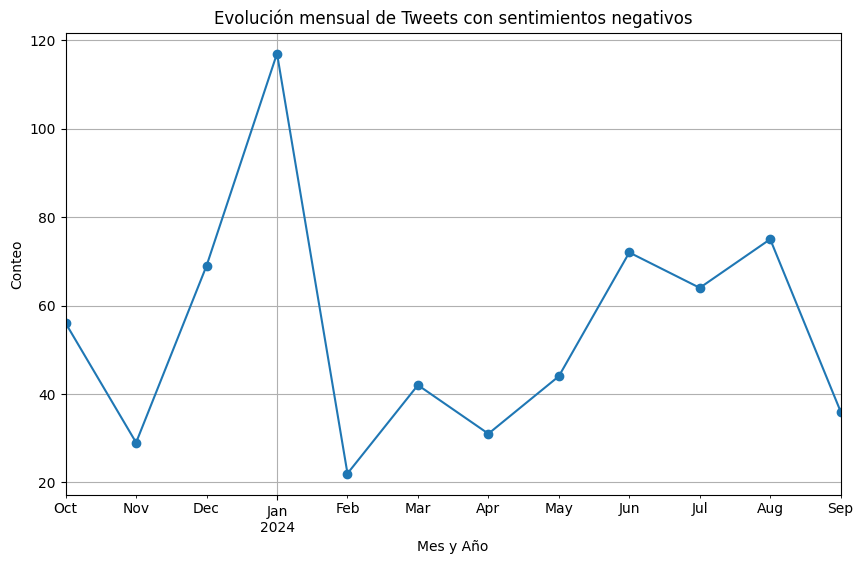

In [ ]:
# Filtrar por sentimiento negativo
negativos = dat_grouped[dat_grouped['sentimiento'] == 'NEG']

# Contar los registros por mes y año
conteo_mensual = negativos.groupby('mes_año').size()

# Graficar los resultados
plt.figure(figsize=(10, 6))
conteo_mensual.plot(kind='line', marker='o')
plt.title('Evolución mensual de Tweets con sentimientos negativos')
plt.xlabel('Mes y Año')
plt.ylabel('Conteo')
plt.grid(True)
plt.show()

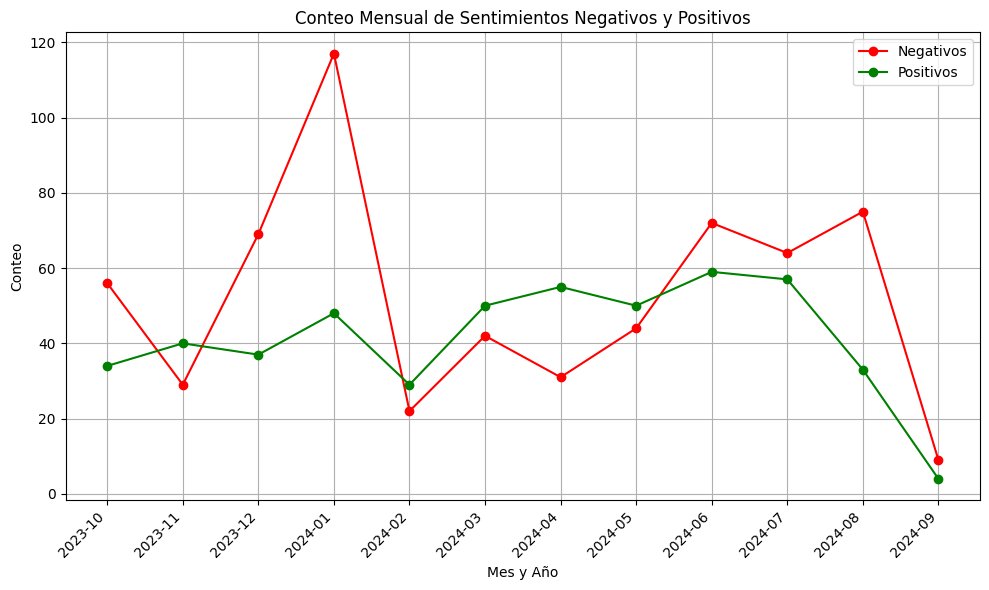

In [ ]:
# Filtrar por sentimiento negativo y positivo
negativos = dat_grouped[dat_grouped['sentimiento'] == 'NEG']
positivos = dat_grouped[dat_grouped['sentimiento'] == 'POS']

# Contar los registros por mes y año
conteo_negativos = negativos.groupby('mes_año').size()
conteo_positivos = positivos.groupby('mes_año').size()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(conteo_negativos.index.astype(str), conteo_negativos, marker='o', color='red', label='Negativos')
plt.plot(conteo_positivos.index.astype(str), conteo_positivos, marker='o', color='green', label='Positivos')
plt.title('Conteo Mensual de Sentimientos Negativos y Positivos')
plt.xlabel('Mes y Año')
plt.ylabel('Conteo')
plt.legend()
plt.grid(True)

# Mejorar el formato del eje X
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()